<a href="https://colab.research.google.com/github/jnramirezg/mecanica_de_solidos/blob/main/codigo/14-(3_4)-def_otras_dir(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14. Especificación de la deformación en otras direcciones 2D (sección 3.4)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-09-15 | Conversión de código de MAXIMA a Python|
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-09-26 | Conversión de cálculos a mano a Python |

**Notas:** 

* En este vídeo del profesor Diego Andrés Álvarez se detalla el proceso matemático: [video](https://youtu.be/2Ve9bJGPJco?t=845).

* El código original en MAXIMA se presenta en el ejercicio propuesto 2 (sección 3.7).

* De forma análoga, es posible demostrar las demás deformaciones $\varepsilon_{y'}$ y $\varepsilon_{x'y'}$.

![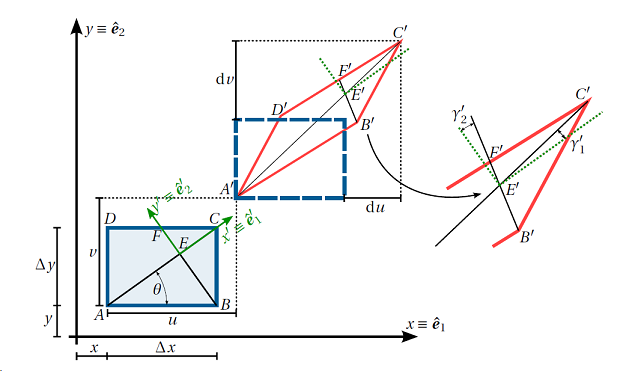](attachment:imagen-2.png)
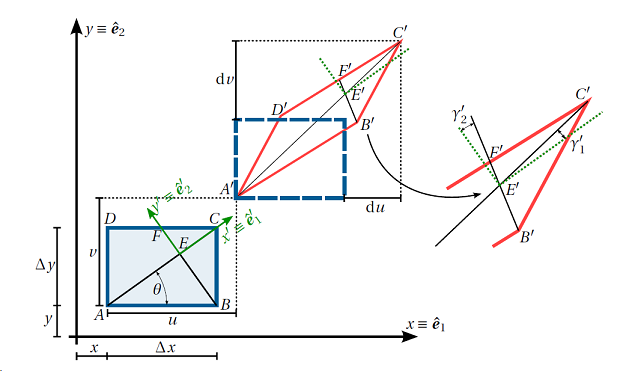

## Demostración de $\varepsilon_{x'}$

Importamos las funciones de la librería ```sympy```:

In [1]:
from sympy import *

Especificamos las variables simbólicas:

In [2]:
x, y, ds, t = symbols("x y Delta_s theta")
ex, ey, exy = symbols("varepsilon_x varepsilon_y varepsilon_xy")
e_xp = symbols("varepsilon_x'")
g1, g2 = symbols('gamma_1 gamma_2')

Específicamos la dependencia funcional $u(x,y)$ y $v(x,y)$:

In [3]:
u = Function("u")(x,y)
v = Function("v")(x,y)

Definimos los diferenciales $\Delta x$ y $\Delta y$ en función de la geometría y el ángulo $\theta$, teniendo en cuenta que $AC = \Delta_s$

In [4]:
dx = ds*cos(t)
dy = ds*sin(t)

Por definición:

$\varepsilon_{x'}=\displaystyle\lim_{AC \to0}\frac{A'C' - AC}{AC}$

Es decir,

$\varepsilon_{x'}=\displaystyle\lim_{\Delta_s \to0}\frac{A'C' - \Delta_s}{\Delta_s}$

De donde despejamos $A'C'$:

$A'C'=(1+\varepsilon_{x'})\Delta_s$


Y calculando $A'C'^2$:

$A'C'=\left((1+\varepsilon_{x'})\Delta_s\right)^2$ (<font color='blue'>1</font>)

**Nota:** (<font color='blue'>1</font>) es válida siempre y cuando $\Delta_s\to0$.

Definimos las coordenadas de los puntos $A'$ y $C'$:

$A':=\left(\color{blue}{A'_x}, \color{green}{A'_y}\right)$

$C':=\left(\color{blue}{C'_x}, \color{green}{C'_y}\right)$

Donde:

$\color{blue}{A'_x}=x + u(x,y)$ 

$\color{green}{A'_y}=y + v(x,y)$

$\color{blue}{C'_x}=x + \Delta_x + \underbrace{u(x,y) + \displaystyle\frac{\partial u}{\partial x}(x,y)\Delta_x + \displaystyle\frac{\partial u}{\partial y}(x,y)\Delta_y}_{u(x+\Delta_x,y+\Delta_y)}$ 

$\color{green}{C'_y}=y + \underbrace{v(x,y)+\displaystyle\frac{\partial v}{\partial x}(x,y)\Delta_x + \displaystyle\frac{\partial v}{\partial y}(x,y)\Delta_y}_{v(x+\Delta_x,y+\Delta_y)}$

**Nota:** $u(x+\Delta_x,y+\Delta_y)$ y $v(x+\Delta_x,y+\Delta_y)$ se determinaron mediante expansiones de series de Taylor en varias variables de primer orden. Las derivadas parciales de ordenes superiores son despreciables gracias a la hipótesis de pequeñas deformaciones.

In [5]:
Apx = x + u  
Apy = y + v
Cpx = x + dx + u + diff(u,x)*dx + diff(u,y)*dy  
Cpy = y + dy + v + diff(v,x)*dx + diff(v,y)*dy

De acuerdo con la ecuación de distancia entre dos puntos:

$A'C'^2=(\color{blue}{C'_x}-\color{green}{A'_x})^2+(\color{blue}{C'_y}-\color{green}{A'_y})^2$ (<font color='blue'>2</font>)

Igualamos (<font color='blue'>1</font>) y (<font color='blue'>2</font>):

$$ \left ( (1+\varepsilon_{x'})\Delta_s  \right )^2 = (\color{blue}{C'_x}-\color{green}{A'_x})^2+(\color{blue}{C'_y}-\color{green}{A'_y})^2  $$

E igualamos a cero:

$$ \left ( (1+\varepsilon_{x'})\Delta_s  \right )^2 - (\color{blue}{C'_x}-\color{green}{A'_x})^2-(\color{blue}{C'_y}-\color{green}{A'_y})^2=0 $$


La escribimos en términos de nuestras variables en ```Python```:

In [6]:
((1+e_xp)*ds)**2 - (Cpx-Apx)**2 - (Cpy-Apy)**2 

Delta_s**2*(varepsilon_x' + 1)**2 - (Delta_s*sin(theta)*Derivative(u(x, y), y) + Delta_s*cos(theta)*Derivative(u(x, y), x) + Delta_s*cos(theta))**2 - (Delta_s*sin(theta)*Derivative(v(x, y), y) + Delta_s*sin(theta) + Delta_s*cos(theta)*Derivative(v(x, y), x))**2

$\displaystyle \Delta_{s}^{2} \left(\varepsilon_{x'} + 1\right)^{2} - \left(\Delta_{s} \sin{\left(\theta \right)} \underbrace{\color{green}{\frac{\partial}{\partial y} u{\left(x,y \right)}}}_{\gamma_2} + \Delta_{s} \cos{\left(\theta \right)} \underbrace{\color{green}{\frac{\partial}{\partial x} u{\left(x,y \right)}}}_{\varepsilon_x} + \Delta_{s} \cos{\left(\theta \right)}\right)^{2} - \left(\Delta_{s} \sin{\left(\theta \right)} \underbrace{\color{green}{\frac{\partial}{\partial y} v{\left(x,y \right)}}}_{\varepsilon_y} + \Delta_{s} \sin{\left(\theta \right)} + \Delta_{s} \cos{\left(\theta \right)} \underbrace{\color{green}{\frac{\partial}{\partial x} v{\left(x,y \right)}}}_{\gamma_1}\right)^{2}=0$

Los términos señalados en verde corresponen a definiciones hechas previamente, por lo tanto, con la función ```.subs()``` de ```sympy``` reemplazamos:

In [7]:
_.subs([(diff(u,x), ex), (diff(v,y), ey), (diff(v,x), g1), (diff(u,y), g2)])

Delta_s**2*(varepsilon_x' + 1)**2 - (Delta_s*gamma_1*cos(theta) + Delta_s*varepsilon_y*sin(theta) + Delta_s*sin(theta))**2 - (Delta_s*gamma_2*sin(theta) + Delta_s*varepsilon_x*cos(theta) + Delta_s*cos(theta))**2

$\displaystyle \color{red}{\Delta_{s}^{2}} \left(\varepsilon_{x'} + 1\right)^{2} - \left(\color{red}{\Delta_{s}} \gamma_{1} \cos{\left(\theta \right)} + \color{red}{\Delta_{s}} \varepsilon_{y} \sin{\left(\theta \right)} + \color{red}{\Delta_{s}} \sin{\left(\theta \right)}\right)^{2} - \left(\color{red}{\Delta_{s}} \gamma_{2} \sin{\left(\theta \right)} + \color{red}{\Delta_{s}} \varepsilon_{x} \cos{\left(\theta \right)} + \color{red}{\Delta_{s}} \cos{\left(\theta \right)}\right)^{2}=0$

Observamos que el término $\Delta_s^2$ se repite en todos los términos, así que la podemos factorizar y cancelar:

In [8]:
expand(_/(ds**2))

-gamma_1**2*cos(theta)**2 - 2*gamma_1*varepsilon_y*sin(theta)*cos(theta) - 2*gamma_1*sin(theta)*cos(theta) - gamma_2**2*sin(theta)**2 - 2*gamma_2*varepsilon_x*sin(theta)*cos(theta) - 2*gamma_2*sin(theta)*cos(theta) - varepsilon_x**2*cos(theta)**2 - 2*varepsilon_x*cos(theta)**2 + varepsilon_x'**2 + 2*varepsilon_x' - varepsilon_y**2*sin(theta)**2 - 2*varepsilon_y*sin(theta)**2 - sin(theta)**2 - cos(theta)**2 + 1

$\displaystyle 
- \underbrace{\color{red}{\gamma_{1}^{2}}}_{=0} \cos^{2}{\left(\theta \right)} 
- 2 \underbrace{\color{red}{\gamma_{1} \varepsilon_{y}}}_{=0} \sin{\left(\theta \right)} \cos{\left(\theta \right)} 
- 2 \gamma_{1} \sin{\left(\theta \right)} \cos{\left(\theta \right)} 
- \underbrace{\color{red}{\gamma_{2}^{2}}}_{=0} \sin^{2}{\left(\theta \right)} 
- 2 \underbrace{\color{red}{\gamma_{2} \varepsilon_{x}}}_{=0} \sin{\left(\theta \right)} \cos{\left(\theta \right)} 
- 2 \gamma_{2} \sin{\left(\theta \right)} \cos{\left(\theta \right)} 
- \underbrace{\color{red}{\varepsilon_{x}^{2}}}_{=0} \cos^{2}{\left(\theta \right)} 
- 2 \varepsilon_{x} \cos^{2}{\left(\theta \right)} 
+ \underbrace{\color{red}{\varepsilon_{x'}^{2}}}_{=0} 
+ 2 \varepsilon_{x'} 
- \underbrace{\color{red}{\varepsilon_{y}^{2}}}_{=0} \sin^{2}{\left(\theta \right)}
- 2 \varepsilon_{y} \sin^{2}{\left(\theta \right)} 
- \sin^{2}{\left(\theta \right)} 
- \cos^{2}{\left(\theta \right)} + 1=0$

Los términos en rojo son aproxiamadamente cero gracias a la hipótesis de deformaciones pequeñas, que si se elevan al cuadrado son mucho más pequeñas que las deformaciones elevadas a la uno. Mediante la función ```.subs()``` de ```sympy``` reemplazamos con ceros:

In [9]:
_.subs([(g1**2, 0), (g1*ey, 0), (g2**2, 0), (g2*ex, 0), (ex**2, 0), (e_xp**2, 0), (ey**2, 0)])

-2*gamma_1*sin(theta)*cos(theta) - 2*gamma_2*sin(theta)*cos(theta) - 2*varepsilon_x*cos(theta)**2 + 2*varepsilon_x' - 2*varepsilon_y*sin(theta)**2 - sin(theta)**2 - cos(theta)**2 + 1

Se despeja $\varepsilon_{x'}$ almacenado simbólicamente como ```e_xp```, con la función ```sympy.solve()```:

In [10]:
solve(_, e_xp)[0]

gamma_1*sin(2*theta)/2 + gamma_2*sin(2*theta)/2 + varepsilon_x*cos(2*theta)/2 + varepsilon_x/2 - varepsilon_y*cos(2*theta)/2 + varepsilon_y/2

Factorizamos $\sin(2\theta)$ y $\cos(2\theta)$:

In [11]:
factor(_, sin(2*t), cos(2*t))

(varepsilon_x + varepsilon_y + (gamma_1 + gamma_2)*sin(2*theta) + (varepsilon_x - varepsilon_y)*cos(2*theta))/2

Previamente, habíamos definido $\varepsilon_{xy}=\gamma_1 + \gamma_2$, por lo que reemplazamos:

In [12]:
_.subs((g1+g2), 2*exy)

varepsilon_x/2 + varepsilon_xy*sin(2*theta) + varepsilon_y/2 + (varepsilon_x - varepsilon_y)*cos(2*theta)/2

Obteniendo:
$$\varepsilon_{x'} = \displaystyle\frac{\varepsilon_x+\varepsilon_y}{2} 
+ \displaystyle\frac{\varepsilon_x-\varepsilon_y}{2} \cos(2\theta)
+ \varepsilon_{xy}\sin(2\theta)$$

Que alternativamente la podemos escribir:
$$\varepsilon_{x'} =
\cos^{2}{\left(\theta \right)} \varepsilon_x
+\sin^{2}{\left(\theta \right)} \varepsilon_y
+ \sin{\left(\theta \right)} \cos{\left(\theta \right)} \varepsilon_{xy}
$$

---

### Análisis a mano

De acá en adelante procedemos de forma manual:

**(1) Todos los términos en rojo son aproximadamente cero debido a que son diferenciales de segundo orden sumados con diferenciales de primer orden.**

$$\color{red}{\varepsilon_{x'}^{2}} 
+ 2 \varepsilon_{x'} 
- \sin^{2}{\left(\theta \right)} \color{red}{\left(\frac{\partial}{\partial y} u{\left(x,y \right)}\right)^{2}} 
- \sin^{2}{\left(\theta \right)} \color{red}{\left(\frac{\partial}{\partial y} v{\left(x,y \right)}\right)^{2}}
- 2 \sin^{2}{\left(\theta \right)} \frac{\partial}{\partial y} v{\left(x,y \right)} - \sin^{2}{\left(\theta \right)} 
- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)} \color{red}{\frac{\partial}{\partial x} u{\left(x,y \right)} \frac{\partial}{\partial y} u{\left(x,y \right)}}
- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)} \frac{\partial}{\partial y} u{\left(x,y \right)} 
- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)} \color{red}{\frac{\partial}{\partial x} v{\left(x,y \right)} \frac{\partial}{\partial y} v{\left(x,y \right)}} 
- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)} \frac{\partial}{\partial x} v{\left(x,y \right)} 
- \cos^{2}{\left(\theta \right)} \color{red}{\left(\frac{\partial}{\partial x} u{\left(x,y \right)}\right)^{2}}
- 2 \cos^{2}{\left(\theta \right)} \frac{\partial}{\partial x} u{\left(x,y \right)} 
- \cos^{2}{\left(\theta \right)} \color{red}{\left(\frac{\partial}{\partial x} v{\left(x,y \right)}\right)^{2}} 
- \cos^{2}{\left(\theta \right)} + 1=0$$

**(2) Los términos indicados en rojo: $\color{red}{- \sin^{2}{\left(\theta \right)}- \cos^{2}{\left(\theta \right)}+ 1}=0$**

$$\displaystyle 
2 \varepsilon_{x'} 
- 2 \sin^{2}{\left(\theta \right)} \frac{\partial}{\partial y} v{\left(x,y \right)} 
\color{red}{- \sin^{2}{\left(\theta \right)}} 
- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)} \frac{\partial}{\partial y} u{\left(x,y \right)} 
- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)} \frac{\partial}{\partial x} v{\left(x,y \right)} 
- 2 \cos^{2}{\left(\theta \right)} \frac{\partial}{\partial x} u{\left(x,y \right)} 
\color{red}{- \cos^{2}{\left(\theta \right)}+ 1}=0$$

**(3) Se factorizan los términos en verde:**

$$\displaystyle 
2 \varepsilon_{x'} 
- 2 \sin^{2}{\left(\theta \right)} \frac{\partial}{\partial y} v{\left(x,y \right)} 
\color{green}{- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)}} \frac{\partial}{\partial y} u{\left(x,y \right)} 
\color{green}{- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)}} \frac{\partial}{\partial x} v{\left(x,y \right)} 
- 2 \cos^{2}{\left(\theta \right)} \frac{\partial}{\partial x} u{\left(x,y \right)} 
=0$$

**(4) Los términos en azul, por definción: $\color{blue}{\frac{\partial}{\partial y} v{\left(x,y \right)}} = \varepsilon_y$
, $\color{blue}{\frac{\partial}{\partial y} u{\left(x,y \right)}
+ \frac{\partial}{\partial x} v{\left(x,y \right)}} = \varepsilon_{xy}$, $\color{blue}{\frac{\partial}{\partial x} u{\left(x,y \right)}} = \varepsilon_x$**

$$\displaystyle 
2 \varepsilon_{x'} 
- 2 \sin^{2}{\left(\theta \right)} \color{blue}{\frac{\partial}{\partial y} v{\left(x,y \right)}} 
- 2 \sin{\left(\theta \right)} \cos{\left(\theta \right)} \color{blue}{\left(\frac{\partial}{\partial y} u{\left(x,y \right)} 
+ \frac{\partial}{\partial x} v{\left(x,y \right)}\right)}
- 2 \cos^{2}{\left(\theta \right)} \color{blue}{\frac{\partial}{\partial x} u{\left(x,y \right)}} 
=0$$

**(5) Despejamos $\varepsilon_{x'}$**:

$$\varepsilon_{x'} =
\cos^{2}{\left(\theta \right)} \color{blue}{\varepsilon_x}
+\sin^{2}{\left(\theta \right)} \color{blue}{\varepsilon_y} 
+ \sin{\left(\theta \right)} \cos{\left(\theta \right)} \color{blue}{\varepsilon_{xy}}
$$

De forma análoga, es posible demostrar las demás deformaciones $\varepsilon_{y'}$ y $\varepsilon_{x'y'}$:

$$\varepsilon_{y'} =
\sin^{2}{\left(\theta \right)} \color{blue}{\varepsilon_x}
+\cos^{2}{\left(\theta \right)} \color{blue}{\varepsilon_y} 
- \sin{\left(\theta \right)} \cos{\left(\theta \right)} \color{blue}{\varepsilon_{xy}}
$$

$$\varepsilon_{x'y'} =
\sin{\left(\theta \right)}\cos{\left(\theta \right)} \color{blue}{\varepsilon_x}
-\sin{\left(\theta \right)}\cos{\left(\theta \right)}\color{blue}{\varepsilon_y} 
+ \left(\cos{\left(\theta \right)}^2-\sin{\left(\theta \right)}^2\right)\color{blue}{\varepsilon_{xy}}
$$